### Unsupervised Machine Learning
Assignment #3 <br>
Basic Sequential Clustering Algrorithm <br>
Michael Zwartz<br>

#### Technical Description
Basic Sequential Clustering (BSCA) is a very simple clstering method. Hence the "basic" in its name. In unsupervised machine learning clustering is a important technique to group together instances to sort new data or extract significant features. There are many variants of BSCA that change based on the user defined distance measurment used, threshold of dissimilarity, and maximum # of clusters. 

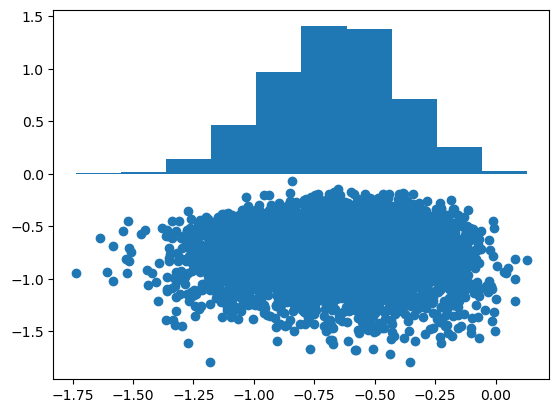

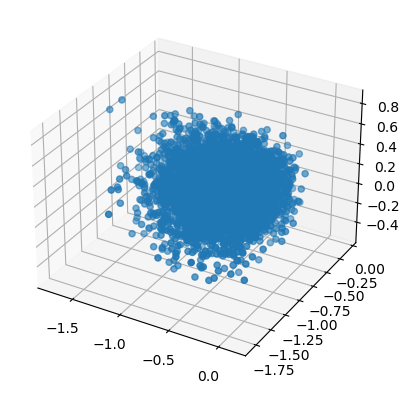

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

#load file
data = pd.read_csv('batStats_clean20.csv')

#import LDA and PCA data
from PCAandLDA import batStats1D, batStats2D, batStats3D

#add 1D array to stars dataframe
data['PCA1'] = batStats1D


In [2]:
#USER PRARAMETERS DEFINED
#m = max number of clusters set by user
m=3
#a = alpha, threshold of dissimilarity set by user
a=0.9

#t = counter, counts number of iterations or clusters created
t=1

#initialize cluster dictionary
clusters = dict(zip(range(m), [[] for i in range(m)]))

#assign the first data point to cluster 1
clusters[0].append(data.PCA1[0])

In [ ]:
#iterate through data points after the first one
for row in data.PCA1[1:]:
#add at least 1 data point to each cluster   
#if counter is less than max clusters aka not all clusters have been instantiated
    c=0 
    currentclusters=t
    distance = dict(zip(range(currentclusters), [[] for i in range(currentclusters)]))
    
    for c in range(currentclusters):
        distance[c].append(abs(row-np.mean(clusters[c])))
    
    shortest_dist=min(distance.values())
    closest_cluster=list(distance.keys())[list(distance.values()).index(shortest_dist)]
    
    if t<m and shortest_dist[0] >a:
        print('cluster ' + str(c+1) + ' is made')
        clusters[currentclusters].append(row)
        t=t+1
    #after all clusters have at least one data point sort the rest of the data point by choosing cluster with closest centroid
    else:  
        clusters[closest_cluster].append(row)




In [17]:
clusters[c]

[-1.5837026093724402,
 -1.468481336114913,
 -1.2655715585690186,
 -1.360407317839496,
 -1.273883204120154,
 -1.0806315621557467,
 -1.0403299674182704,
 -1.1055039011050307,
 -1.0030846585396067,
 -1.1513470193788948,
 -1.000074695885822,
 -1.116823280017762,
 -0.9464415034346062,
 -1.3127212307019587,
 -1.0323532274664735,
 -0.9605343268059208,
 -1.3289869527194151,
 -1.005630363137732,
 -1.134457376626273,
 -0.8988493123259002,
 -0.9110691984223669,
 -1.0186982587849411,
 -1.2527722542000213,
 -1.1026844984952326,
 -1.282547237421895,
 -1.0622075411937137,
 -1.0849468762674233,
 -0.8966168316390464,
 -1.1899723704345702,
 -0.9379673030967749,
 -1.1703818035585758,
 -1.0789883790126251,
 -0.8896844986683765,
 -0.8863258638697883,
 -1.208571729415269,
 -0.8971096338920285,
 -1.1963266444849623,
 -1.0587632569230583,
 -1.054226626480579,
 -0.954333915095641,
 -1.1889399336709676,
 -1.0548078567513515,
 -1.0740285506083775,
 -1.0746001944574528,
 -1.003623940657585,
 -0.9341009436694553,


In [19]:
cluster_df=pd.DataFrame()
for c in clusters:
    for i in clusters[c]:
        cluster_df=cluster_df.append({'Value': i, 'Cluster': c}, ignore_index=True)

C:\Users\Michael\AppData\Local\Temp\ipykernel_13876\2859163736.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Michael\AppData\Local\Temp\ipykernel_13876\2859163736.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Michael\AppData\Local\Temp\ipykernel_13876\2859163736.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Michael\AppData\Local\Temp\ipykernel_13876\2859163736.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Michael\AppData\Local\Temp\ipykernel_13876\2859163736.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [7]:
fig=go.Figure()

fig=px.scatter(x=cluster_df[Value], color=cluster_df.Cluster, color_continuous_scale=['bad','avg','good'], title="BSCA with 1D PCA BatStats Data alpha=" + str(a) + ", max clusters=" + str(m))
fig.update_layout(coloraxis_colorbar=dict(
    title="Clusters",
    tickvals=[0,1,2,3, 4],
    ticktext=["c1","c2","c3","c4", "c5"],
    lenmode="pixels", len=500,
))
#fig.add_trace(go.scatter(x=clusters[1], y=range(len(clusters[0]))))
fig.write_html('result2.html', auto_open=True)

AttributeError: 'DataFrame' object has no attribute 'Value'